## Data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_excel("/content/drive/My Drive/응통 분석 공모전/데이터/2019 국민여행조사_국내여행.xlsx") 

In [99]:
data.head()

,ID,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,S5A_1,S5A_2,S5A_3,S5A_4,S5A_5,S5A_6,S5A_7,MON_AGO_EXP_1,MON_AGO_EXP_2,MON_AGO_EXP_3,MON_AGO_EXP_4,MON_AGO_EXP_5,MON_AGO_EXP_6,SS5,SS5A_1,SS5A_2,SS5A_3,SS5A_4,SS5A_5,SS5A_6,SS5A_7,D_TRA1_CHECK,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,...,국내_여행방문지_기타전체12,국내_여행방문지_기타전체13,국내_여행방문지_기타전체14,국내_여행방문지_기타전체15,국내_여행방문지_기타전체16,국내_여행방문지_기타전체17,국내_여행방문지_기타숙박1,국내_여행방문지_기타숙박2,국내_여행방문지_기타숙박3,국내_여행방문지_기타숙박4,국내_여행방문지_기타숙박5,국내_여행방문지_기타숙박6,국내_여행방문지_기타숙박7,국내_여행방문지_기타숙박8,국내_여행방문지_기타숙박9,국내_여행방문지_기타숙박10,국내_여행방문지_기타숙박11,국내_여행방문지_기타숙박12,국내_여행방문지_기타숙박13,국내_여행방문지_기타숙박14,국내_여행방문지_기타숙박15,국내_여행방문지_기타숙박16,국내_여행방문지_기타숙박17,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
0,11010550341_1000000,1,0,1,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,2018.0,12.0,31.0,2019.0,1.0,1.0,1.0,2168800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11010550341_1000005,1,0,1,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,2019.0,1.0,18.0,2019.0,1.0,20.0,2.0,280000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11010550341_1000007,2,0,1,2,2,2,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,2019.0,1.0,1.0,2019.0,1.0,3.0,2.0,345500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11010550341_1000012,1,0,1,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,2019.0,1.0,25.0,2019.0,1.0,27.0,2.0,300000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11010550341_1000013,1,0,1,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,2019.0,1.0,10.0,2019.0,1.0,13.0,3.0,1425000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 국내 가족여행 분석
1. 1회 평균 여행 일수 / 지출액
2. 가족여행 주요 이동 수단
3. 가족여행 주요 이용 숙박시설
4. 여행 전 및 여행지 지출 비중 

### 1. **1회평균 여행 일수 / 지출액**
- 가족 여행시 1회평균 여행 일수는 1.58일로 국내 전체 여행 1.3일보다 평균 여행일수가 높음 
- 특히 자녀가 있는 가구일수록 평균 여행일수가 높음 
- 가족여행시 1회평균 여행 지출액이 국내여행 전체보다 높음 

In [80]:
# 1. 1회 평균 여행 일수

## 국내 여행 전체 일수 
tour_1_day = data['D_TRA1_S_Day']
tour_2_day = data['D_TRA2_S_Day']
tour_3_day = data['D_TRA3_S_Day']
tour_4_day = data['D_TRA4_S_Day']
tour_5_day = data['D_TRA5_S_Day']
tour_6_day = data['D_TRA6_S_Day']
tour_7_day = data['D_TRA7_S_Day']
tour_8_day = data['D_TRA8_S_Day']


## 국내 여행 전체 경비 
tour_1_cost = data['D_TRA1_COST']
tour_2_cost = data['D_TRA2_COST']
tour_3_cost = data['D_TRA3_COST']
tour_4_cost = data['D_TRA4_COST']
tour_5_cost = data['D_TRA5_COST']
tour_6_cost = data['D_TRA6_COST']
tour_7_cost = data['D_TRA7_COST']
tour_8_cost = data['D_TRA8_COST']

In [81]:
all_tour = np.hstack((tour_1_day, tour_2_day, tour_3_day, tour_4_day,
           tour_5_day, tour_6_day, tour_7_day, tour_8_day))

all_cost = np.hstack((tour_1_cost, tour_2_cost, tour_3_cost, tour_4_cost,
           tour_5_cost, tour_6_cost, tour_7_cost, tour_8_cost))

In [82]:
print(all_tour.shape)
print(all_cost.shape)

(386152,)
(386152,)


In [83]:
all_tour = pd.DataFrame(all_tour)
all_tour = all_tour.dropna()

all_cost = pd.DataFrame(all_cost)
all_cost = all_cost.dropna()

In [85]:
in_tour = (all_tour.sum() / len(all_tour)) * 2
in_cost = (all_cost.sum() / len(all_cost)) * 2

In [86]:
print(in_tour)
print(in_cost)

0    0.105461
dtype: float64
0    47420.894101
dtype: float64


In [88]:
## 가족여행 전체 여행일수 
data = pd.DataFrame(data)
data = data.dropna()

all_fam_day = 0
count = 0

for i in range(len(data)):
  if data['A7B_1'][i] == 1.0 :
    count += 1
    tmp = data['D_TRA1_S_Day'][i] + data['D_TRA2_S_Day'][i] + data['D_TRA3_S_Day'][i] + data['D_TRA4_S_Day'][i] + data['D_TRA5_S_Day'][i] + data['D_TRA6_S_Day'][i] + data['D_TRA7_S_Day'][i] + data['D_TRA8_S_Day'][i]
    all_fam_day += tmp

print((all_fam_day / count)*2)


## 가족여행 전체 지출액 
all_fam_cost = 0
count = 0

for i in range(len(data)):
  if data['A7B_1'][i] == 1.0 :
    count += 1
    tmp = data['D_TRA1_COST'][i] + data['D_TRA2_COST'][i] + data['D_TRA3_COST'][i] + data['D_TRA4_COST'][i] + data['D_TRA5_COST'][i] + data['D_TRA6_COST'][i] + data['D_TRA7_COST'][i] + data['D_TRA8_COST'][i]
    all_fam_cost += tmp

print((all_fam_cost / count)*2)

1.5962002898084044
805829.2023828691


In [48]:
data['DQ3A_1']

0        0
1        0
2        Y
3        0
4        0
        ..
48264    0
48265    Y
48266    Y
48267    0
48268    0
Name: DQ3A_1, Length: 48269, dtype: object

In [94]:
### 자녀가 없는 가구의 가족여행 횟수 
### 자녀가 있는 가구의 가족 여행 횟수 
data = pd.DataFrame(data)
data = data.dropna()

all_child_cost = 0
all_not_child_cost = 0

count = 0
not_count = 0

for i in range(len(data)):
  if data['DQ3A_1'][i] != 0 :
    count += 1
    tmp = data['D_TRA1_COST'][i] + data['D_TRA2_COST'][i] + data['D_TRA3_COST'][i] + data['D_TRA4_COST'][i] + data['D_TRA5_COST'][i] + data['D_TRA6_COST'][i] + data['D_TRA8_COST'][i]
    all_child_cost += tmp
  else :
    not_count += 1
    tmp = data['D_TRA1_COST'][i] + data['D_TRA2_COST'][i] + data['D_TRA3_COST'][i] + data['D_TRA4_COST'][i] + data['D_TRA5_COST'][i] + data['D_TRA6_COST'][i] + data['D_TRA8_COST'][i]
    all_not_child_cost += tmp

non_child_cost =(all_child_cost / count)*2
child_cost = (all_not_child_cost / not_count)*2

print(non_child_cost) # 자녀가 없는 가구 
print(child_cost) # 자녀가 있는 가구 


### 자녀가 없는 가구의 전체 지출액 
### 자녀가 있는 가구의 전체 지출액 
all_child_cost = 0
all_not_child_cost = 0

count = 0
not_count = 0

for i in range(len(data)):
  if data['DQ3A_1'][i] != 0 :
    count += 1
    tmp = data['D_TRA1_S_Day'][i] + data['D_TRA2_S_Day'][i] + data['D_TRA3_S_Day'][i] + data['D_TRA4_S_Day'][i] + data['D_TRA5_S_Day'][i] + data['D_TRA6_S_Day'][i] + data['D_TRA7_S_Day'][i] + data['D_TRA8_S_Day'][i]
    all_child_day += tmp
  else :
    not_count += 1
    tmp = data['D_TRA1_S_Day'][i] + data['D_TRA2_S_Day'][i] + data['D_TRA3_S_Day'][i] + data['D_TRA4_S_Day'][i] + data['D_TRA5_S_Day'][i] + data['D_TRA6_S_Day'][i] + data['D_TRA7_S_Day'][i] + data['D_TRA8_S_Day'][i]
    all_not_child_day += tmp

non_child =(all_child_day / count)*2
child = (all_not_child_day / not_count)*2

print((all_child_day / count)*2) # 자녀가 없는 가구 
print((all_not_child_day / not_count)*2) # 자녀가 있는 가구 

329942.46547214035
420901.58052420174
1.5185302789748243
1.8293166564978645


<BarContainer object of 2 artists>

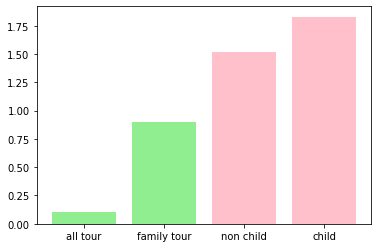

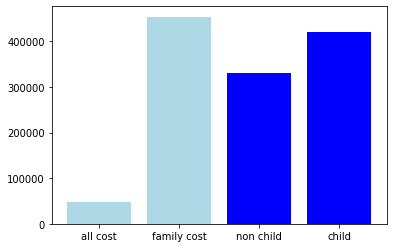

In [98]:
plt.figure()
plt.bar(['all tour', 'family tour'], [in_tour, (all_fam_day / count)*2], color = 'lightgreen')
plt.bar(['non child', 'child'], [non_child, child], color = 'pink')

plt.figure()
plt.bar(['all cost', 'family cost'], [in_cost, (all_fam_cost / count)*2], color = 'lightblue')
plt.bar(['non child', 'child'], [non_child_cost, child_cost], color = 'blue')

### **2. 가족여행 주요 이동수단**
- 가족여행시 자가용 이용비율이 국내여행 전체보다 높음


In [102]:
## 순위별로 선호 이동수단 가중치 지정 
first = data['A5_1']
second =data['A5_2']
thrid = data['A5_3']

In [107]:
## 국내여행 전체 
data.groupby(['A5_1']).sum()

,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,S5A_1,S5A_2,S5A_3,S5A_4,S5A_5,S5A_6,S5A_7,MON_AGO_EXP_1,MON_AGO_EXP_2,MON_AGO_EXP_3,MON_AGO_EXP_4,MON_AGO_EXP_5,MON_AGO_EXP_6,SS5,SS5A_1,SS5A_2,SS5A_3,SS5A_4,SS5A_5,SS5A_6,SS5A_7,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,...,국내_여행방문지_기타전체12,국내_여행방문지_기타전체13,국내_여행방문지_기타전체14,국내_여행방문지_기타전체15,국내_여행방문지_기타전체16,국내_여행방문지_기타전체17,국내_여행방문지_기타숙박1,국내_여행방문지_기타숙박2,국내_여행방문지_기타숙박3,국내_여행방문지_기타숙박4,국내_여행방문지_기타숙박5,국내_여행방문지_기타숙박6,국내_여행방문지_기타숙박7,국내_여행방문지_기타숙박8,국내_여행방문지_기타숙박9,국내_여행방문지_기타숙박10,국내_여행방문지_기타숙박11,국내_여행방문지_기타숙박12,국내_여행방문지_기타숙박13,국내_여행방문지_기타숙박14,국내_여행방문지_기타숙박15,국내_여행방문지_기타숙박16,국내_여행방문지_기타숙박17,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
A5_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,7250,1572,50742,50742,46991,50742,49815,48658,37609.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,45889,49651,48336,50595,50090,50134,32312.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,9131935.0,26594.0,56111.0,9131937.0,26579.0,59213.0,3371.0,6.786213e+08,9183.0,3.810762e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,64068.0,3158.0,196.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70571.0,7686.0,1545.0,571.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,20554,1163,21272,32978,35083,35717,35806,35996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31963,35187,34274,35941,35638,35894,21600.0,0.0,0.0,3.0,0.0,0.0,0.0,49.0,36293512.0,122927.0,273260.0,36293583.0,122187.0,280574.0,10757.0,5.509001e+09,46857.0,2.193209e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,11756.0,283.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25401.0,1729.0,242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,829,34,928,1295,1429,1428,1463,1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1336,1419,1404,1462,1452,1461,961.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1471851.0,4643.0,11047.0,1471851.0,4647.0,11607.0,684.0,2.310506e+08,1327.0,1.269444e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,601.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,686,25,661,1166,1180,1201,1204,1204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1126,1192,1164,1208,1200,1200,866.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1219476.0,4171.0,8525.0,1219477.0,4167.0,9646.0,1369.0,6.404018e+08,1476.0,2.721899e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,492.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,581.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,99,7,98,178,182,183,183,182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169,183,178,184,179,184,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185748.0,541.0,1386.0,185748.0,541.0,1530.0,144.0,7.748661e+07,264.0,3.045491e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,604,66,588,902,963,973,988,983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,853,962,943,986,982,979,538.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,985271.0,3105.0,7174.0,985272.0,3094.0,7362.0,219.0,1.010204e+08,832.0,5.856629e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,337.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,543.0,60.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,1517,87,1669,2343,2603,2619,2658,2651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2387,2590,2552,2658,2645,2643,1712.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2671137.0,8511.0,20117.0,2671137.0,8513.0,20967.0,912.0,2.733340e+08,2314.0,1.640576e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,681.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,860.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,1187,48,1111,2083,2084,2114,2120,2115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1896,2104,2039,2122,2117,2

In [109]:
# 이동수단 재범주화 
## 1순위
for i in range(len(data)):
  if data['A5_1'][i] == 0.0 :
    data['A5_1'][i] = 0.0
  elif data['A5_1'][i] == 1.0 :
    data['A5_1'][i] = 1.0
  elif data['A5_1'][i] == 2.0:
    data['A5_1'][i] = 2.0
  elif data['A5_1'][i] == 3.0 :
    data['A5_1'][i] = 3.0
  elif data['A5_1'][i] == 4.0 :
    data['A5_1'][i] = 6.0
  elif data['A5_1'][i] == 5.0 :
    data['A5_1'][i] = 4.0
  elif data['A5_1'][i] == 6.0 :
    data['A5_1'][i] = 5.0
  else :
    data['A5_1'][i] = 6.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

In [112]:
## 2순위 
for i in range(len(data)):
  if data['A5_2'][i] == 0.0 :
    data['A5_2'][i] = 0.0
  elif data['A5_2'][i] == 1.0 :
    data['A5_2'][i] = 1.0
  elif data['A5_2'][i] == 2.0:
    data['A5_2'][i] = 2.0
  elif data['A5_2'][i] == 3.0 :
    data['A5_2'][i] = 3.0
  elif data['A5_2'][i] == 4.0 :
    data['A5_2'][i] = 6.0
  elif data['A5_2'][i] == 5.0 :
    data['A5_2'][i] = 4.0
  elif data['A5_2'][i] == 6.0 :
    data['A5_2'][i] = 5.0
  else :
    data['A5_2'][i] = 6.0

## 3순위
for i in range(len(data)):
  if data['A5_3'][i] == 0.0 :
    data['A5_3'][i] = 0.0
  elif data['A5_3'][i] == 1.0 :
    data['A5_3'][i] = 1.0
  elif data['A5_3'][i] == 2.0:
    data['A5_3'][i] = 2.0
  elif data['A5_3'][i] == 3.0 :
    data['A5_3'][i] = 3.0
  elif data['A5_3'][i] == 4.0 :
    data['A5_3'][i] = 6.0
  elif data['A5_3'][i] == 5.0 :
    data['A5_3'][i] = 4.0
  elif data['A5_3'][i] == 6.0 :
    data['A5_3'][i] = 5.0
  else :
    data['A5_3'][i] = 6.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykern

In [121]:
# 범주별로 국내여행 전체 확인 
data.groupby('A5_1').count()

,ID,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,S5A_1,S5A_2,S5A_3,S5A_4,S5A_5,S5A_6,S5A_7,MON_AGO_EXP_1,MON_AGO_EXP_2,MON_AGO_EXP_3,MON_AGO_EXP_4,MON_AGO_EXP_5,MON_AGO_EXP_6,SS5,SS5A_1,SS5A_2,SS5A_3,SS5A_4,SS5A_5,SS5A_6,SS5A_7,D_TRA1_CHECK,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,...,국내_여행방문지_기타전체12,국내_여행방문지_기타전체13,국내_여행방문지_기타전체14,국내_여행방문지_기타전체15,국내_여행방문지_기타전체16,국내_여행방문지_기타전체17,국내_여행방문지_기타숙박1,국내_여행방문지_기타숙박2,국내_여행방문지_기타숙박3,국내_여행방문지_기타숙박4,국내_여행방문지_기타숙박5,국내_여행방문지_기타숙박6,국내_여행방문지_기타숙박7,국내_여행방문지_기타숙박8,국내_여행방문지_기타숙박9,국내_여행방문지_기타숙박10,국내_여행방문지_기타숙박11,국내_여행방문지_기타숙박12,국내_여행방문지_기타숙박13,국내_여행방문지_기타숙박14,국내_여행방문지_기타숙박15,국내_여행방문지_기타숙박16,국내_여행방문지_기타숙박17,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
A5_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,...,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371,25371
1.0,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,...,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043,18043
2.0,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,...,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733,733
3.0,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,...,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606
4.0,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,...,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496
5.0,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,...,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331
6.0,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,...,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689,1689


In [124]:
# 범주별로 가족여행 전체 이동수단 / 1순위 
fam_data = data[data['A7B_1'] == 1.0]
fam_data.groupby('A5_1').sum()

,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,S5A_1,S5A_2,S5A_3,S5A_4,S5A_5,S5A_6,S5A_7,MON_AGO_EXP_1,MON_AGO_EXP_2,MON_AGO_EXP_3,MON_AGO_EXP_4,MON_AGO_EXP_5,MON_AGO_EXP_6,SS5,SS5A_1,SS5A_2,SS5A_3,SS5A_4,SS5A_5,SS5A_6,SS5A_7,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,...,국내_여행방문지_기타전체12,국내_여행방문지_기타전체13,국내_여행방문지_기타전체14,국내_여행방문지_기타전체15,국내_여행방문지_기타전체16,국내_여행방문지_기타전체17,국내_여행방문지_기타숙박1,국내_여행방문지_기타숙박2,국내_여행방문지_기타숙박3,국내_여행방문지_기타숙박4,국내_여행방문지_기타숙박5,국내_여행방문지_기타숙박6,국내_여행방문지_기타숙박7,국내_여행방문지_기타숙박8,국내_여행방문지_기타숙박9,국내_여행방문지_기타숙박10,국내_여행방문지_기타숙박11,국내_여행방문지_기타숙박12,국내_여행방문지_기타숙박13,국내_여행방문지_기타숙박14,국내_여행방문지_기타숙박15,국내_여행방문지_기타숙박16,국내_여행방문지_기타숙박17,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
A5_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,12869,714,13759,20279,22093,22652,22566,22680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20241,22110,21529,22672,22463,22619,13646.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,22871212.0,77771.0,168230.0,22871259.0,77285.0,173264.0,7429.0,3.769862e+09,32134.0,1.348369e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,7237.0,115.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16323.0,927.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,195,8,244,277,337,345,348,347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326,335,334,347,345,348,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,349287.0,985.0,2494.0,349287.0,986.0,2704.0,241.0,7.235774e+07,395.0,3.243321e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,193.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,353,13,337,588,594,614,610,611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,580,604,586,614,611,610,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,617814.0,2186.0,4363.0,617815.0,2177.0,4973.0,703.0,3.924634e+08,901.0,1.402620e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,384.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,351.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,97,11,98,147,158,164,164,163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141,161,154,164,162,161,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163539.0,475.0,983.0,163539.0,475.0,1033.0,50.0,2.653809e+07,189.0,1.089379e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,205,7,280,282,364,367,372,371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,344,364,354,371,371,370,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,373515.0,1098.0,2633.0,373515.0,1098.0,2857.0,224.0,5.184026e+07,359.0,2.652840e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,341,12,335,576,595,605,603,605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568,602,574,607,597,605,428.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,611757.0,1898.0,4048.0,611757.0,1902.0,4431.0,507.0,2.678431e+08,883.0,9.689435e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,357.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
## 2순위 
fam_data = data[data['A7B_1'] == 1.0]
fam_data.groupby('A5_2').sum()

,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,S5A_1,S5A_2,S5A_3,S5A_4,S5A_5,S5A_6,S5A_7,MON_AGO_EXP_1,MON_AGO_EXP_2,MON_AGO_EXP_3,MON_AGO_EXP_4,MON_AGO_EXP_5,MON_AGO_EXP_6,SS5,SS5A_1,SS5A_2,SS5A_3,SS5A_4,SS5A_5,SS5A_6,SS5A_7,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,...,국내_여행방문지_기타전체12,국내_여행방문지_기타전체13,국내_여행방문지_기타전체14,국내_여행방문지_기타전체15,국내_여행방문지_기타전체16,국내_여행방문지_기타전체17,국내_여행방문지_기타숙박1,국내_여행방문지_기타숙박2,국내_여행방문지_기타숙박3,국내_여행방문지_기타숙박4,국내_여행방문지_기타숙박5,국내_여행방문지_기타숙박6,국내_여행방문지_기타숙박7,국내_여행방문지_기타숙박8,국내_여행방문지_기타숙박9,국내_여행방문지_기타숙박10,국내_여행방문지_기타숙박11,국내_여행방문지_기타숙박12,국내_여행방문지_기타숙박13,국내_여행방문지_기타숙박14,국내_여행방문지_기타숙박15,국내_여행방문지_기타숙박16,국내_여행방문지_기타숙박17,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
A5_2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,12838,708,13782,20222,22065,22617,22541,22648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20230,22083,21514,22643,22432,22587,13670.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,22840928.0,77525.0,168156.0,22840971.0,77082.0,173262.0,7346.0,3.704334e+09,31914.0,1.332633e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,7275.0,115.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16081.0,885.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,145,5,192,209,257,264,266,265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257,264,248,266,265,265,206.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266508.0,842.0,1660.0,266508.0,843.0,1896.0,267.0,1.232132e+08,374.0,4.130444e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,97.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,86,8,97,130,146,147,150,149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,148,142,148,149,147,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149406.0,477.0,1005.0,149406.0,477.0,1067.0,62.0,2.439163e+07,182.0,1.005186e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,200,8,169,304,308,317,312,317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,294,314,299,316,313,317,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,319002.0,1049.0,2143.0,319002.0,1055.0,2309.0,352.0,1.904838e+08,459.0,6.793439e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,341.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,124,6,152,182,220,224,224,223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203,218,212,224,221,223,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224109.0,695.0,1564.0,224109.0,695.0,1722.0,158.0,4.708420e+07,223.0,2.425109e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,78,6,82,113,131,132,131,131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118,129,124,131,131,131,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133254.0,373.0,918.0,133254.0,373.0,995.0,77.0,2.631101e+07,134.0,1.254165e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,589,24,579,989,1014,1046,1039,1044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,967,1020,992,1047,1038,1043,714.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1053917.0,3452.0,7305.0,1053922.0,3398.0,8011.0,892.0,4.650867e+08,1575.0,1.666646e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,533.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,574.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
## 3순위 
fam_data = data[data['A7B_1'] == 1.0]
fam_data.groupby('A5_3').sum()

,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,S5A_1,S5A_2,S5A_3,S5A_4,S5A_5,S5A_6,S5A_7,MON_AGO_EXP_1,MON_AGO_EXP_2,MON_AGO_EXP_3,MON_AGO_EXP_4,MON_AGO_EXP_5,MON_AGO_EXP_6,SS5,SS5A_1,SS5A_2,SS5A_3,SS5A_4,SS5A_5,SS5A_6,SS5A_7,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,...,국내_여행방문지_기타전체12,국내_여행방문지_기타전체13,국내_여행방문지_기타전체14,국내_여행방문지_기타전체15,국내_여행방문지_기타전체16,국내_여행방문지_기타전체17,국내_여행방문지_기타숙박1,국내_여행방문지_기타숙박2,국내_여행방문지_기타숙박3,국내_여행방문지_기타숙박4,국내_여행방문지_기타숙박5,국내_여행방문지_기타숙박6,국내_여행방문지_기타숙박7,국내_여행방문지_기타숙박8,국내_여행방문지_기타숙박9,국내_여행방문지_기타숙박10,국내_여행방문지_기타숙박11,국내_여행방문지_기타숙박12,국내_여행방문지_기타숙박13,국내_여행방문지_기타숙박14,국내_여행방문지_기타숙박15,국내_여행방문지_기타숙박16,국내_여행방문지_기타숙박17,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
A5_3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,13697,749,14681,21565,23522,24108,24026,24142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21602,23546,22935,24138,23917,24077,14686.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,24349120.0,82385.0,178432.0,24349167.0,81903.0,184456.0,8543.0,4.239670e+09,33998.0,1.532677e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,7935.0,115.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16958.0,948.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,35,2,38,55,59,62,62,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,61,55,62,61,62,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62589.0,248.0,479.0,62590.0,239.0,458.0,72.0,3.345619e+07,92.0,1.275004e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,94,5,100,141,158,162,162,161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149,159,151,161,161,161,106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161520.0,500.0,1134.0,161520.0,500.0,1251.0,117.0,4.826921e+07,166.0,2.170042e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,45,3,42,74,75,78,77,77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,77,74,78,77,78,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78741.0,224.0,525.0,78741.0,224.0,613.0,88.0,4.783700e+07,125.0,1.547598e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,23,1,24,34,36,37,38,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36,35,35,37,38,38,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36342.0,124.0,266.0,36342.0,124.0,299.0,33.0,9.641880e+06,46.0,4.467360e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,18,0,17,25,25,28,27,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,26,28,28,26,28,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28266.0,73.0,208.0,28266.0,73.0,236.0,28.0,1.353389e+07,34.0,7.645230e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,148,5,151,255,266,272,271,270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254,272,253,271,269,269,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270546.0,859.0,1707.0,270546.0,860.0,1949.0,273.0,1.884966e+08,400.0,6.066462e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. **가족여행 주요 이용 숙박시설**
- 가족 여행시 가족/친지집, 콘도미니엄/리조트 숙박 비율이 국내여행 전체보다 높음 

In [131]:
acc1 = data['A6_1'].sum() # 호텔 
acc2 = data['A6_2'].sum() # 모델/여관
acc3 = data['A6_3'].sum() # 펜션
acc4 = data['A6_4'].sum() # 콘도미니엄/리조트
acc5 = data['A6_5'].sum() # 유스호스텔
acc6 = data['A6_6'].sum() # 야영 / 캠핑 
acc7 = data['A6_7'].sum() # 연수원 / 수련원
acc8 = data['A6_8'].sum() # 전통 한옥 숙박시설 
acc9 = data['A6_9'].sum() # 게스트 하우스 
acc10 = data['A6_10'].sum() # 민박 (도시형 / 농촌형)
acc11 = data['A6_11'].sum() # 자연휴양림 내 숙박시설 
acc12 = data['A6_12'].sum() # 가족 / 친지집
acc13 = data['A6_13'].sum() # 무박여행 
acc14 = data['A6_14'].sum() # 기타 

print(acc1,'\n',acc2,'\n', acc3,'\n', acc4,'\n', acc5,'\n', acc6,'\n',
      acc7,'\n', acc8,'\n', acc9,'\n', acc10,'\n', acc11,'\n',
      acc12, '\n',acc13,'\n', acc14)

1161.0 
 2002.0 
 9135.0 
 5244.0 
 770.0 
 1512.0 
 735.0 
 1112.0 
 2304.0 
 3480.0 
 2827.0 
 27528.0 
 988.0 
 1694.0


In [138]:
data['A6_2']

0        0.0
1        2.0
2        0.0
3        0.0
4        0.0
        ... 
48264    0.0
48265    0.0
48266    0.0
48267    0.0
48268    0.0
Name: A6_2, Length: 48269, dtype: float64

In [142]:
# 숙박시설 재범주화 (총 9개) data['accom0date']
## one hot to categorical 
for i in range(len(data)):
  if data['A6_1'][i] == 1 :
    data['ID'][i] = 1
  if data['A6_2'][i] == 2:
    data['ID'][i] = 2
  if data['A6_3'][i] == 3:
    data['ID'][i] = 3
  if data['A6_4'][i] == 4:
    data['ID'][i] = 4
  if data['A6_6'][i] == 6:
    data['ID'][i] = 5
  if data['A6_10'][i] == 10:
    data['ID'][i] == 6
  if data['A6_11'][i] == 11:
    data['ID'][i] == 7
  if data['A6_12'][i] == 12:
    data['ID'][i] = 8
  if data['A6_5'][i] == 5 or data['A6_7'][i] == 7 or data['A6_8'][i] == 8 or data['A6_9'][i]== 9 or data['A6_10'][i] == 10 or data['A6_11'][i] == 11:
    data['ID'][i] = 9 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A valu

In [143]:
data.groupby(by = ['ID']).count()

,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,S5A_1,S5A_2,S5A_3,S5A_4,S5A_5,S5A_6,S5A_7,MON_AGO_EXP_1,MON_AGO_EXP_2,MON_AGO_EXP_3,MON_AGO_EXP_4,MON_AGO_EXP_5,MON_AGO_EXP_6,SS5,SS5A_1,SS5A_2,SS5A_3,SS5A_4,SS5A_5,SS5A_6,SS5A_7,D_TRA1_CHECK,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,...,국내_여행방문지_기타전체12,국내_여행방문지_기타전체13,국내_여행방문지_기타전체14,국내_여행방문지_기타전체15,국내_여행방문지_기타전체16,국내_여행방문지_기타전체17,국내_여행방문지_기타숙박1,국내_여행방문지_기타숙박2,국내_여행방문지_기타숙박3,국내_여행방문지_기타숙박4,국내_여행방문지_기타숙박5,국내_여행방문지_기타숙박6,국내_여행방문지_기타숙박7,국내_여행방문지_기타숙박8,국내_여행방문지_기타숙박9,국내_여행방문지_기타숙박10,국내_여행방문지_기타숙박11,국내_여행방문지_기타숙박12,국내_여행방문지_기타숙박13,국내_여행방문지_기타숙박14,국내_여행방문지_기타숙박15,국내_여행방문지_기타숙박16,국내_여행방문지_기타숙박17,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,...,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119
2,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,...,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981
3,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,...,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005,3005
4,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,...,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299
5,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,...,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247
8,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,...,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284
9,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,...,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334,39334


In [144]:
## 가족여행  이동수단
fam_data = data[data['A7B_1'] == 1.0]
fam_data.groupby('ID').count()

,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,S5A_1,S5A_2,S5A_3,S5A_4,S5A_5,S5A_6,S5A_7,MON_AGO_EXP_1,MON_AGO_EXP_2,MON_AGO_EXP_3,MON_AGO_EXP_4,MON_AGO_EXP_5,MON_AGO_EXP_6,SS5,SS5A_1,SS5A_2,SS5A_3,SS5A_4,SS5A_5,SS5A_6,SS5A_7,D_TRA1_CHECK,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,...,국내_여행방문지_기타전체12,국내_여행방문지_기타전체13,국내_여행방문지_기타전체14,국내_여행방문지_기타전체15,국내_여행방문지_기타전체16,국내_여행방문지_기타전체17,국내_여행방문지_기타숙박1,국내_여행방문지_기타숙박2,국내_여행방문지_기타숙박3,국내_여행방문지_기타숙박4,국내_여행방문지_기타숙박5,국내_여행방문지_기타숙박6,국내_여행방문지_기타숙박7,국내_여행방문지_기타숙박8,국내_여행방문지_기타숙박9,국내_여행방문지_기타숙박10,국내_여행방문지_기타숙박11,국내_여행방문지_기타숙박12,국내_여행방문지_기타숙박13,국내_여행방문지_기타숙박14,국내_여행방문지_기타숙박15,국내_여행방문지_기타숙박16,국내_여행방문지_기타숙박17,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,...,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613
2,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,...,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411
3,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,...,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739
4,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,...,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832
5,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,...,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
8,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,...,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754
9,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,...,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933,6933


In [145]:
# 자녀가 있는 가정 경우 
child = data[data['DQ3A_1'] != 0]
child.groupby('ID').count()

,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,S5A_1,S5A_2,S5A_3,S5A_4,S5A_5,S5A_6,S5A_7,MON_AGO_EXP_1,MON_AGO_EXP_2,MON_AGO_EXP_3,MON_AGO_EXP_4,MON_AGO_EXP_5,MON_AGO_EXP_6,SS5,SS5A_1,SS5A_2,SS5A_3,SS5A_4,SS5A_5,SS5A_6,SS5A_7,D_TRA1_CHECK,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,...,국내_여행방문지_기타전체12,국내_여행방문지_기타전체13,국내_여행방문지_기타전체14,국내_여행방문지_기타전체15,국내_여행방문지_기타전체16,국내_여행방문지_기타전체17,국내_여행방문지_기타숙박1,국내_여행방문지_기타숙박2,국내_여행방문지_기타숙박3,국내_여행방문지_기타숙박4,국내_여행방문지_기타숙박5,국내_여행방문지_기타숙박6,국내_여행방문지_기타숙박7,국내_여행방문지_기타숙박8,국내_여행방문지_기타숙박9,국내_여행방문지_기타숙박10,국내_여행방문지_기타숙박11,국내_여행방문지_기타숙박12,국내_여행방문지_기타숙박13,국내_여행방문지_기타숙박14,국내_여행방문지_기타숙박15,국내_여행방문지_기타숙박16,국내_여행방문지_기타숙박17,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,...,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470
2,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,...,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469
3,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,...,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174,1174
4,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,...,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469
5,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
8,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,...,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978,978
9,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,...,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381,18381


In [146]:
# 자녀가 없는 가정의 경우 
non_child = data[data['DQ3A_1'] == 0]
non_child.groupby('ID').count()

,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,S5A_1,S5A_2,S5A_3,S5A_4,S5A_5,S5A_6,S5A_7,MON_AGO_EXP_1,MON_AGO_EXP_2,MON_AGO_EXP_3,MON_AGO_EXP_4,MON_AGO_EXP_5,MON_AGO_EXP_6,SS5,SS5A_1,SS5A_2,SS5A_3,SS5A_4,SS5A_5,SS5A_6,SS5A_7,D_TRA1_CHECK,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,...,국내_여행방문지_기타전체12,국내_여행방문지_기타전체13,국내_여행방문지_기타전체14,국내_여행방문지_기타전체15,국내_여행방문지_기타전체16,국내_여행방문지_기타전체17,국내_여행방문지_기타숙박1,국내_여행방문지_기타숙박2,국내_여행방문지_기타숙박3,국내_여행방문지_기타숙박4,국내_여행방문지_기타숙박5,국내_여행방문지_기타숙박6,국내_여행방문지_기타숙박7,국내_여행방문지_기타숙박8,국내_여행방문지_기타숙박9,국내_여행방문지_기타숙박10,국내_여행방문지_기타숙박11,국내_여행방문지_기타숙박12,국내_여행방문지_기타숙박13,국내_여행방문지_기타숙박14,국내_여행방문지_기타숙박15,국내_여행방문지_기타숙박16,국내_여행방문지_기타숙박17,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,...,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
2,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,...,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512
3,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,...,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831
4,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,...,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830
5,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143
8,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,...,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306
9,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,...,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953,20953


### **4. 여행 전 및 여행지 지출 비중**
- 1인당 지출을 고려하여 여행전/ 여행지 지출 비중을 항목별로 고려함 
- 가족 여행시 여행 전 지출 비용이 국내여행 전체보다 높음
- 가족 여행시 음식점비, 교통비, 쇼피비, 숙박비의 비중이 국내여행 전체보다 높음 

In [148]:
## 1. 여행전 지출 비중 : 항목별 

### 국내 전체 여행전 지출 비용 
data1 = data['NA9_1'] # 거주지역식음료비 
data2 = data['NA9_2'] # 화장품/ 향수 
data3 = data['NA9_3'] # 시계/ 귀금속
data4 = data['NA9_4'] # 일반의류/ 가방
data5 = data['NA9_5'] # 건강식품
data6 = data['NA9_6'] # 의약품
data7 = data['NA9_7'] # 개인위생용품
data8 = data['NA9_8'] # 책/ 잡지/ 가이드북
data9 = data['NA9_9'] # 여행용품 대여료 
data10 = data['NA9_10'] # 기타 

In [151]:
### 가족여행 전체 여행전 지출 비용 
all_fam_cost = 0
count = 0

for i in range(len(data)):
  if data['A7B_1'][i] == 1.0 :
    count += 1
    tmp = data['NA9_1'][i] + data['NA9_2'][i] + data['NA9_3'][i] + data['NA9_4'][i] + data['NA9_5'][i] + data['NA9_6'][i] + data['NA9_7'][i] + data['NA9_8'][i] + data['NA9_9'][i] + data['NA9_10'][i]
    all_fam_cost += tmp

print((all_fam_cost / count))

8472.494767348253


In [152]:
### 자녀가 있는 가정의 지출 비중 
### 자녀가 없는 가정의 지출 비중 
all_child_cost = 0
all_not_child_cost = 0

count = 0
not_count = 0

for i in range(len(data)):
  if data['DQ3A_1'][i] != 0 :
    count += 1
    tmp = data['NA9_1'][i] + data['NA9_2'][i] + data['NA9_3'][i] + data['NA9_4'][i] + data['NA9_5'][i] + data['NA9_6'][i] + data['NA9_7'][i] + data['NA9_8'][i] + data['NA9_9'][i] + data['NA9_10'][i]
    all_child_day += tmp
  else :
    not_count += 1
    tmp = data['NA9_1'][i] + data['NA9_2'][i] + data['NA9_3'][i] + data['NA9_4'][i] + data['NA9_5'][i] + data['NA9_6'][i] + data['NA9_7'][i] + data['NA9_8'][i] + data['NA9_9'][i] + data['NA9_10'][i]
    all_not_child_day += tmp

non_child =(all_child_day / count)
child = (all_not_child_day / not_count)

print((all_child_day / count)*2) # 자녀가 없는 가구 
print((all_not_child_day / not_count)*2) # 자녀가 있는 가구

5871.456384667725
8316.373245881636


In [154]:
## 2. 여행지 지출 비중 : 항목별 

### 국내 전체 여행지 지출 비중 
data1 = data['NA10A_1'] # 여행사  

data2 = data['NA10A_2'] # 여행사 이외 

data3 = data['NA10B'] # 여행 회비/ 모임 회비 

data4 = data['NA10C_1'] # 숙박비
data5 = data['NA10C_2'] 
data6 = data['NA10C_3']  
data7 = data['NA10C_4'] 
data8 = data['NA10C_5'] 
data9 = data['NA10C_6']  
data10 = data['NA10C_7']
data11 = data['NA10C_8'] 
data12 = data['NA10C_9'] 
data13 = data['NA10C_10']
data14 = data['NA10C_11']
data15 = data['NA10C_12']
data16 = data['NA10C_13']
data17 = data['NA10C_14'] 
숙박비 = data4 + data5 + data6+ data7+ data8 + data9 + data10 + data11 + data12+ data13 + data14 + data15 + data16 + data17

data18 = data['NA10D_1'] # 음식점비 
data19 = data['NA10D_2']
data20 = data['NA10D_3']
음식점비 = data18 + data19 + data20

data21 = data['NA10E_1'] # 교통비 
data22 = data['NA10E_2'] 
data23 = data['NA10E_3']  
data24 = data['NA10E_4']  
#data25 = data['NA10E_5'] 
교통비 = data21 + data22 + data23 + data24 #+ data25

data26 = data['NA10F_1']# 여행활동비
data27 = data['NA10F_2']
data28 = data['NA10F_3']
data29 = data['NA10F_4']
data30 = data['NA10F_5']
여행활동비 = data26 + data27 + data28 + data29 + data30

data31 = data['NA10G_1'] # 쇼핑비 
data32 = data['NA10G_2']
data33 = data['NA10G_3']
data34 = data['NA10G_4']
data35 = data['NA10G_5']
쇼핑비 = data31 + data32 + data33 + data34 + data35

data36 = data['NA10H_1'] # 귀금속 시계 지출 비용 
data37 = data['NA10H_2']
data38 = data['NA10H_3']
귀금속 = data36 + data37 + data38

data39 = data['NA10I_1'] # 기타 

In [155]:
## 가족 여행 전체 
### 가족여행 전체 여행지 지출 비용 
all_fam_cost = 0
count = 0

for i in range(len(data)):
  if data['A7B_1'][i] == 1.0 :
    count += 1
    tmp = data1[i] + data2[i] + data3[i] + 숙박비[i] + 음식점비[i] + 교통비[i] + 여행활동비[i] + 귀금속[i] +쇼핑비[i] + data39[i]
    all_fam_cost += tmp

print((all_fam_cost / count))

88698.90677829657


In [156]:
### 자녀가 있는 가정의 지출 비중 
### 자녀가 없는 가정의 지출 비중 
all_child_cost = 0
all_not_child_cost = 0

count = 0
not_count = 0

for i in range(len(data)):
  if data['DQ3A_1'][i] != 0 :
    count += 1
    tmp = data1[i] + data2[i] + data3[i] + 숙박비[i] + 음식점비[i] + 교통비[i] + 여행활동비[i] + 귀금속[i] +쇼핑비[i] + data39[i]
    all_child_day += tmp
  else :
    not_count += 1
    tmp = data1[i] + data2[i] + data3[i] + 숙박비[i] + 음식점비[i] + 교통비[i] + 여행활동비[i] + 귀금속[i] +쇼핑비[i] + data39[i]
    all_not_child_day += tmp

non_child =(all_child_day / count)
child = (all_not_child_day / not_count)

print((all_child_day / count)*2) # 자녀가 없는 가구 
print((all_not_child_day / not_count)*2) # 자녀가 있는 가구

93355.0572011794
100198.02821842587
